Chapter 6とChapter 7は同じNotebookを使います。各Chapterの先頭のセルへは以下のリンクから移動できます。

* [Chapter 6. 表形式のデータを前処理しよう](#Chapter-6.-表形式のデータを前処理しよう)
* [Chapter 7. データを予測する回帰分析を学ぼう](#Chapter-7.-データを予測する回帰分析を学ぼう)

# Chapter 6. 表形式のデータを前処理しよう

## Lesson 51. pandasでファイルを読み込んでみましょう

In [108]:
import pandas  # pandasをインポートする

df = pandas.read_csv(
    'data.csv',  # 読み込むファイルの場所を指定する
    encoding='Shift_JIS',  # 文字コードはShift_JIS
)
df

,date,station,temp
0,2018/9/1,札幌,19.5
1,2018/9/1,青森,21.5
2,2018/9/1,仙台,21.5
3,2018/9/1,東京,25.9
4,2018/9/1,福岡,25.5
...,...,...,...
1495,2018/9/30,長崎,21.9
1496,2018/9/30,佐賀,21.3
1497,2018/9/30,熊本,20.7
1498,2018/9/30,稚内,16.6


## Lesson 52. pandasで表データから行を取り出してみましょう

In [109]:
df_ch6_3 = pandas.DataFrame([
    ('リンゴ', 76, 2),
    ('ゴマ', 230, 1),
    ('マグロ', 580, 7),
    ('ロコモコ', 310, 3),
    ('コショウ', 108, 3),
    ('ウノハナ', 216, 3),
    ('ナシ', 126, 3),
    ('シュウマイ', 860, 3),
    ('イカ', 460, 3),
    ('カキ', 324, 3),
], columns=['name', 'price', 'amount'])
df_ch6_3

,name,price,amount
0,リンゴ,76,2
1,ゴマ,230,1
2,マグロ,580,7
3,ロコモコ,310,3
4,コショウ,108,3
5,ウノハナ,216,3
6,ナシ,126,3
7,シュウマイ,860,3
8,イカ,460,3
9,カキ,324,3


In [110]:
df_ch6_3.head()

,name,price,amount
0,リンゴ,76,2
1,ゴマ,230,1
2,マグロ,580,7
3,ロコモコ,310,3
4,コショウ,108,3


In [111]:
df_ch6_3.tail()

,name,price,amount
5,ウノハナ,216,3
6,ナシ,126,3
7,シュウマイ,860,3
8,イカ,460,3
9,カキ,324,3


In [112]:
df_ch6_3.iloc[2:5]

,name,price,amount
2,マグロ,580,7
3,ロコモコ,310,3
4,コショウ,108,3


In [113]:
df.head()

,date,station,temp
0,2018/9/1,札幌,19.5
1,2018/9/1,青森,21.5
2,2018/9/1,仙台,21.5
3,2018/9/1,東京,25.9
4,2018/9/1,福岡,25.5


In [114]:
df.tail()

,date,station,temp
1495,2018/9/30,長崎,21.9
1496,2018/9/30,佐賀,21.3
1497,2018/9/30,熊本,20.7
1498,2018/9/30,稚内,16.6
1499,2018/9/30,函館,17.6


In [115]:
df_sliced = df.iloc[2:7]  # 2~6番目の行を取り出す
df_sliced  # Jupyter Notebook上に表示する

,date,station,temp
2,2018/9/1,仙台,21.5
3,2018/9/1,東京,25.9
4,2018/9/1,福岡,25.5
5,2018/9/1,鹿児島,26.8
6,2018/9/1,那覇,27.6


In [116]:
df_sliced.iloc[1:4]

,date,station,temp
3,2018/9/1,東京,25.9
4,2018/9/1,福岡,25.5
5,2018/9/1,鹿児島,26.8


## Lesson 53. DataFrameから列を取り出して操作してみましょう

In [117]:
series_temp = df['temp']
series_temp

0       19.5
1       21.5
2       21.5
3       25.9
4       25.5
        ... 
1495    21.9
1496    21.3
1497    20.7
1498    16.6
1499    17.6
Name: temp, Length: 1500, dtype: float64

In [118]:
mean_temp = series_temp.mean()
mean_temp

23.020840197693538

In [119]:
series_filled = series_temp.fillna(mean_temp)
series_filled

0       19.5
1       21.5
2       21.5
3       25.9
4       25.5
        ... 
1495    21.9
1496    21.3
1497    20.7
1498    16.6
1499    17.6
Name: temp, Length: 1500, dtype: float64

In [120]:
df['temp'] = series_filled
df

,date,station,temp
0,2018/9/1,札幌,19.5
1,2018/9/1,青森,21.5
2,2018/9/1,仙台,21.5
3,2018/9/1,東京,25.9
4,2018/9/1,福岡,25.5
...,...,...,...
1495,2018/9/30,長崎,21.9
1496,2018/9/30,佐賀,21.3
1497,2018/9/30,熊本,20.7
1498,2018/9/30,稚内,16.6


## Lesson 54. Indexを使ってDataFrameを変形してみましょう

In [121]:
df_stations = pandas.read_csv(  # 地点データを開く
    'amedas_stations.csv',
    encoding='Shift_JIS',
    index_col=0,  # 0列目（地点名）をIndexにする
)
df_stations.head()  # 先頭5行を表示する

,latitude,longitude,altitude
station_name,,,
稚内,45.42,141.68,3
札幌,43.06,141.33,17
函館,41.82,140.75,35
青森,40.82,140.77,3
秋田,39.72,140.10,6


In [122]:
df = df.join(  # 気温データにDataFrameを結合する
    df_stations,  # 結合するDataFrameは地点データ
    how="left",
    on='station'  # 気温データのstation列の値で結合する
)
df

,date,station,temp,latitude,longitude,altitude
0,2018/9/1,札幌,19.5,43.06,141.33,17
1,2018/9/1,青森,21.5,40.82,140.77,3
2,2018/9/1,仙台,21.5,38.26,140.90,39
3,2018/9/1,東京,25.9,35.69,139.75,25
4,2018/9/1,福岡,25.5,33.58,130.38,3
...,...,...,...,...,...,...
1495,2018/9/30,長崎,21.9,32.73,129.87,27
1496,2018/9/30,佐賀,21.3,33.27,130.31,6
1497,2018/9/30,熊本,20.7,32.81,130.71,38
1498,2018/9/30,稚内,16.6,45.42,141.68,3


## Lesson 55. DataFrameからデータを検索してみましょう

In [123]:
df[df['temp'] >= 18]

,date,station,temp,latitude,longitude,altitude
0,2018/9/1,札幌,19.5,43.06,141.33,17
1,2018/9/1,青森,21.5,40.82,140.77,3
2,2018/9/1,仙台,21.5,38.26,140.90,39
3,2018/9/1,東京,25.9,35.69,139.75,25
4,2018/9/1,福岡,25.5,33.58,130.38,3
...,...,...,...,...,...,...
1493,2018/9/30,大分,21.0,33.24,131.62,5
1494,2018/9/30,宮崎,24.9,31.94,131.41,9
1495,2018/9/30,長崎,21.9,32.73,129.87,27
1496,2018/9/30,佐賀,21.3,33.27,130.31,6


In [124]:
df[
    (df['temp'] >= 18) &  # 気温が18度以上
    (df['temp'] < 20)  # 気温が20度未満
]

,date,station,temp,latitude,longitude,altitude
0,2018/9/1,札幌,19.5,43.06,141.33,17
100,2018/9/3,札幌,19.7,43.06,141.33,17
148,2018/9/3,稚内,18.4,45.42,141.68,3
198,2018/9/4,稚内,19.5,45.42,141.68,3
398,2018/9/8,稚内,19.2,45.42,141.68,3
...,...,...,...,...,...,...
1475,2018/9/30,金沢,19.4,36.59,136.63,6
1476,2018/9/30,福井,19.7,36.06,136.22,9
1484,2018/9/30,鳥取,19.5,35.49,134.24,7
1486,2018/9/30,松江,19.5,35.46,133.07,17


In [125]:
df[
    (df['station'].isin(['東京', '札幌'])) &  # 地点の絞り込み
    (df['temp'] < 20)  # 気温が20度未満
]

,date,station,temp,latitude,longitude,altitude
0,2018/9/1,札幌,19.5,43.06,141.33,17
100,2018/9/3,札幌,19.7,43.06,141.33,17
400,2018/9/9,札幌,18.3,43.06,141.33,17
550,2018/9/12,札幌,16.5,43.06,141.33,17
600,2018/9/13,札幌,18.8,43.06,141.33,17
850,2018/9/18,札幌,19.7,43.06,141.33,17
900,2018/9/19,札幌,18.5,43.06,141.33,17
950,2018/9/20,札幌,17.7,43.06,141.33,17
1000,2018/9/21,札幌,18.1,43.06,141.33,17
1003,2018/9/21,東京,17.7,35.69,139.75,25


## Lesson 56. データを可視化してみましょう

In [126]:
# XXX: 本文中にはないコード
# Jupyter Notebook の問題で、 `pyplot` モジュールの初回 import 時にグラフが表示されない
from matplotlib import pyplot

<AxesSubplot:xlabel='latitude', ylabel='temp'>

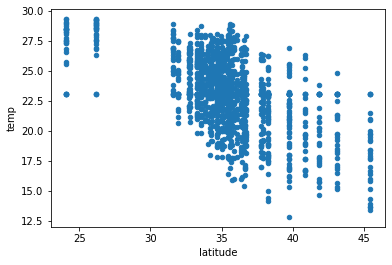

In [127]:
df.plot.scatter('latitude', 'temp')

<AxesSubplot:xlabel='temp', ylabel='latitude'>

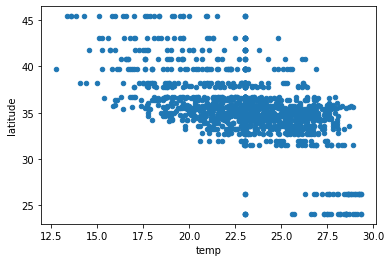

In [128]:
df.plot.scatter('temp', 'latitude')

<AxesSubplot:xlabel='altitude', ylabel='longitude'>

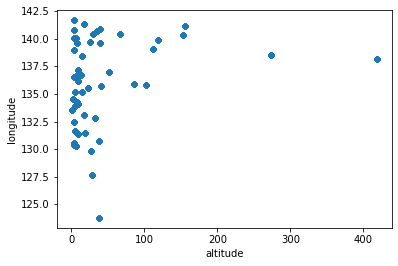

In [129]:
df.plot.scatter('altitude', 'longitude')

# Chapter 7. データを予測する回帰分析を学ぼう

## Lesson 59. 緯度から気温を予測してみましょう

In [130]:
df7 = df[df['date'] == '2018/9/1']
df7

,date,station,temp,latitude,longitude,altitude
0,2018/9/1,札幌,19.5,43.06,141.33,17
1,2018/9/1,青森,21.5,40.82,140.77,3
2,2018/9/1,仙台,21.5,38.26,140.90,39
3,2018/9/1,東京,25.9,35.69,139.75,25
4,2018/9/1,福岡,25.5,33.58,130.38,3
5,2018/9/1,鹿児島,26.8,31.56,130.55,4
6,2018/9/1,那覇,27.6,26.21,127.69,28
7,2018/9/1,波照間,27.3,24.06,123.77,38
8,2018/9/1,秋田,22.2,39.72,140.10,6
9,2018/9/1,盛岡,22.0,39.70,141.17,155


<AxesSubplot:xlabel='latitude', ylabel='temp'>

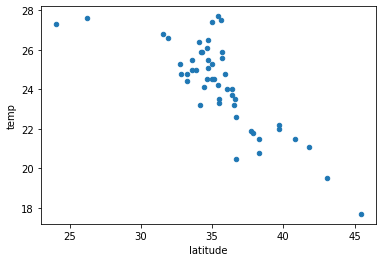

In [131]:
df7.plot.scatter('latitude', 'temp')

In [132]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg

LinearRegression()

In [180]:
X = df7[['latitude']]
X

,latitude
0,43.06
1,40.82
2,38.26
3,35.69
4,33.58
5,31.56
6,26.21
7,24.06
8,39.72
9,39.70


In [190]:
y = df7[['temp']]
y

,temp
0,19.5
1,21.5
2,21.5
3,25.9
4,25.5
5,26.8
6,27.6
7,27.3
8,22.2
9,22.0


In [191]:
reg.fit(X, y)  # 学習

LinearRegression()

In [192]:
df7[df7['station'].isin(['東京', '長野'])]  # 東京と長野の気温データを取り出す

,date,station,temp,latitude,longitude,altitude
3,2018/9/1,東京,25.9,35.69,139.75,25
20,2018/9/1,長野,20.5,36.66,138.19,418


In [202]:
reg.predict([[35.69], [36.66]])

C:\Users\kenta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[24.13603503],
       [23.64120668]])

C:\Users\kenta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


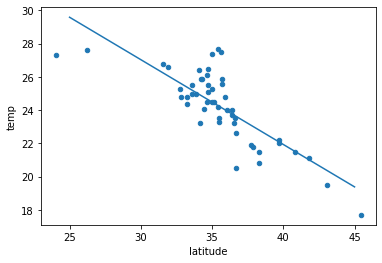

In [138]:
x1, x2 = 25, 45  # ←←❶ 説明変数の軸から適当な値を2つ選ぶ
y1, y2 = reg.predict([[x1], [x2]])  # ←←❷ 目的変数の値を予測する
ax = df7.plot.scatter('latitude', 'temp')  # ←←❸ 散布図を表示する
ax.plot((x1, x2), (y1, y2))  # ←←❹ 回帰直線を引く

## Lesson 60. 説明変数を追加してみましょう

In [169]:
X = df7[['latitude', 'altitude']]
X

,latitude,altitude
0,43.06,17
1,40.82,3
2,38.26,39
3,35.69,25
4,33.58,3
5,31.56,4
6,26.21,28
7,24.06,38
8,39.72,6
9,39.70,155


In [140]:
y = df7['temp']
y

0     19.5
1     21.5
2     21.5
3     25.9
4     25.5
5     26.8
6     27.6
7     27.3
8     22.2
9     22.0
10    20.8
11    21.9
12    23.7
13    27.5
14    23.2
15    24.8
16    21.8
17    24.0
18    25.6
19    27.7
20    20.5
21    22.6
22    24.2
23    27.4
24    24.5
25    23.5
26    24.0
27    24.5
28    25.5
29    25.3
30    24.5
31    25.9
32    26.1
33    26.5
34    23.5
35    25.1
36    23.3
37    24.1
38    23.2
39    25.0
40    25.9
41    26.4
42    25.0
43    24.4
44    26.6
45    25.3
46    24.8
47    24.8
48    17.7
49    21.1
Name: temp, dtype: float64

In [166]:
reg2 = LinearRegression()  # ←←❶
reg2.fit(X, y)  # ←←❷

LinearRegression()

In [142]:
df7[df7['station'].isin(['東京', '長野'])]  # 東京と長野の気温データを取り出す

,date,station,temp,latitude,longitude,altitude
3,2018/9/1,東京,25.9,35.69,139.75,25
20,2018/9/1,長野,20.5,36.66,138.19,418


In [143]:
reg2.predict([
    [35.69, 6],  # 東京の緯度と標高
    [36.6, 418],  # 長野の緯度と標高
])

C:\Users\kenta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.3220365 , 21.80845063])

## Lesson 61. 回帰分析のモデルを比べてみましょう

In [144]:
from sklearn.model_selection import train_test_split

y = df7['temp']
X_train, X_test, y_train, y_test = train_test_split(df7, y, random_state=0)

In [145]:
X1_train = X_train[['latitude']]
X1_train

,latitude
34,35.49
18,35.67
7,24.06
14,36.55
45,32.73
48,45.42
29,35.01
15,35.88
30,34.67
32,34.68


In [146]:
X1_test = X_test[['latitude']]
X1_test

,latitude
28,34.73
11,37.76
10,38.26
41,34.07
2,38.26
27,34.99
38,34.16
31,34.23
22,35.40
4,33.58


In [147]:
reg1 = LinearRegression()
reg1.fit(X1_train, y_train)
y_pred1 = reg1.predict(X1_test)
y_pred1

array([24.61272633, 23.15469222, 22.91409253, 24.93031792, 22.91409253,
       24.48761449, 24.88700998, 24.85332602, 24.29032275, 25.16610561,
       24.62716231, 24.63197431, 23.97273116])

In [148]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred1)

0.557801348545274

In [149]:
X2_train = X_train[['latitude', 'altitude']]  # ←←❶ 説明変数を取り出す
X2_train

,latitude,altitude
34,35.49,7
18,35.67,273
7,24.06,38
14,36.55,119
45,32.73,27
48,45.42,3
29,35.01,41
15,35.88,8
30,34.67,102
32,34.68,23


In [150]:
X2_test = X_test[['latitude', 'altitude']]  # ←←❶  説明変数を取り出す
X2_test

,latitude,altitude
28,34.73,3
11,37.76,67
10,38.26,153
41,34.07,2
2,38.26,39
27,34.99,86
38,34.16,18
31,34.23,14
22,35.40,13
4,33.58,3


In [151]:
reg2 = LinearRegression()
reg2.fit(X2_train, y_train)  # ←←❷ モデルを学習させる
y_pred2 = reg2.predict(X2_test)  # ←←❸ テストデータで目的変数を予測する
y_pred2

array([24.77632917, 23.08715932, 22.51784567, 25.09442308, 22.95694637,
       24.33284068, 24.98994371, 24.97202204, 24.41880816, 25.32387232,
       24.78290938, 24.78767063, 24.11997305])

In [152]:
r2_score(y_test, y_pred2)  # ←←❹ 決定係数を計算する


0.6245736797449455

## Lesson 62. pybotが未知の地点の気温を予測できるように改良しましょう

In [153]:
reg = LinearRegression()
X = df7[['latitude']]
y = df7['temp']
reg.fit(X, y)

LinearRegression()

In [154]:
import pickle

with open('trained-reg-model.pickle', 'wb') as f:
    pickle.dump(reg, f)